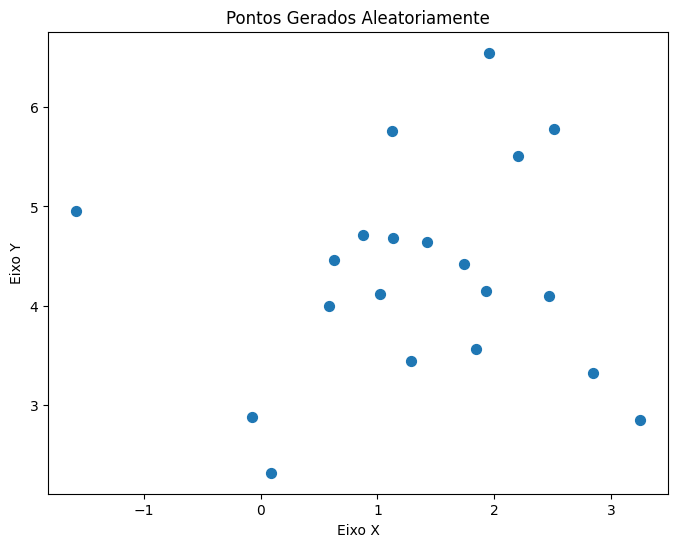

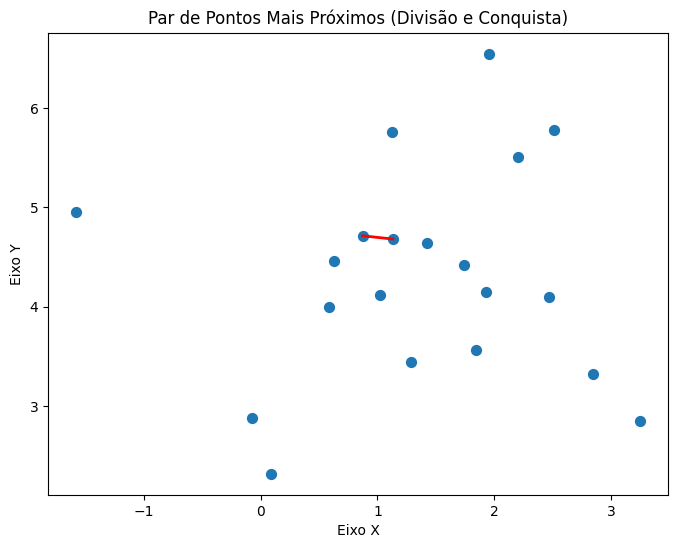

Distância mínima: 0.26
Ponto 1: [1.1312175  4.68194985]
Ponto 2: [0.87305123 4.71438583]


In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

def distancia_euclidiana(ponto1, ponto2):
  """Calcula a distância euclidiana entre dois pontos."""
  return np.sqrt(np.sum((ponto1 - ponto2)**2))

def forca_bruta(pontos):
  """Encontra o par de pontos mais próximo usando força bruta."""
  n = len(pontos)
  if n < 2:
    return float('inf'), None, None

  distancia_minima = distancia_euclidiana(pontos[0], pontos[1])
  ponto1_min = pontos[0]
  ponto2_min = pontos[1]

  for i in range(n):
    for j in range(i + 1, n):
      distancia = distancia_euclidiana(pontos[i], pontos[j])
      if distancia < distancia_minima:
        distancia_minima = distancia
        ponto1_min = pontos[i]
        ponto2_min = pontos[j]

  return distancia_minima, ponto1_min, ponto2_min

def par_mais_proximo_recursivo(pontos_x, pontos_y):
  """Encontra o par de pontos mais próximo usando divisão e conquista."""
  n = len(pontos_x)

  # Caso base: Se houver menos de 3 pontos, use força bruta
  if n <= 3:
    return forca_bruta(pontos_x)

  # Divide os pontos em duas metades
  meio = n // 2
  esquerda_x = pontos_x[:meio]
  direita_x = pontos_x[meio:]
  esquerda_y = pontos_y[:meio]
  direita_y = pontos_y[meio:]

  # Encontra o par mais próximo recursivamente em cada metade
  distancia_esquerda, ponto1_esquerda, ponto2_esquerda = par_mais_proximo_recursivo(esquerda_x, esquerda_y)
  distancia_direita, ponto1_direita, ponto2_direita = par_mais_proximo_recursivo(direita_x, direita_y)

  # Determina a menor distância e o par de pontos correspondente
  if distancia_esquerda < distancia_direita:
    distancia_minima = distancia_esquerda
    ponto1_min = ponto1_esquerda
    ponto2_min = ponto2_esquerda
  else:
    distancia_minima = distancia_direita
    ponto1_min = ponto1_direita
    ponto2_min = ponto2_direita

  # Encontra o par mais próximo na faixa vertical central
  faixa = []
  for i in range(n):
    if abs(pontos_x[i][0] - pontos_x[meio][0]) < distancia_minima:
      faixa.append(pontos_y[i])

  faixa.sort(key=lambda ponto: ponto[1])

  tamanho_faixa = len(faixa)
  for i in range(tamanho_faixa):
    for j in range(i + 1, min(i + 7, tamanho_faixa)):
      distancia = distancia_euclidiana(faixa[i], faixa[j])
      if distancia < distancia_minima:
        distancia_minima = distancia
        ponto1_min = faixa[i]
        ponto2_min = faixa[j]

  return distancia_minima, ponto1_min, ponto2_min

# Gera pontos aleatórios em 2D
pontos, _ = make_blobs(n_samples=20, centers=1, random_state=0)

# Plota os pontos gerados
plt.figure(figsize=(8, 6))
plt.scatter(pontos[:, 0], pontos[:, 1], s=50)
plt.title('Pontos Gerados Aleatoriamente')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

# Ordena os pontos por coordenada x e y para a abordagem divisão e conquista
pontos_x = sorted(pontos, key=lambda ponto: ponto[0])
pontos_y = sorted(pontos, key=lambda ponto: ponto[1])

# Executa o algoritmo de par mais próximo
distancia, ponto1, ponto2 = par_mais_proximo_recursivo(pontos_x, pontos_y)

# Plota o resultado
plt.figure(figsize=(8, 6))
plt.scatter(pontos[:, 0], pontos[:, 1], s=50)
plt.plot([ponto1[0], ponto2[0]], [ponto1[1], ponto2[1]], 'r-', linewidth=2)
plt.title('Par de Pontos Mais Próximos (Divisão e Conquista)')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

print(f"Distância mínima: {distancia:.2f}")
print(f"Ponto 1: {ponto1}")
print(f"Ponto 2: {ponto2}")

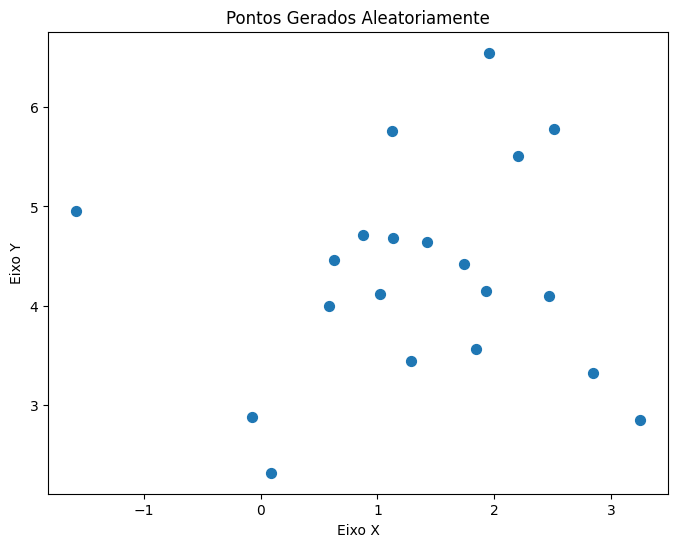

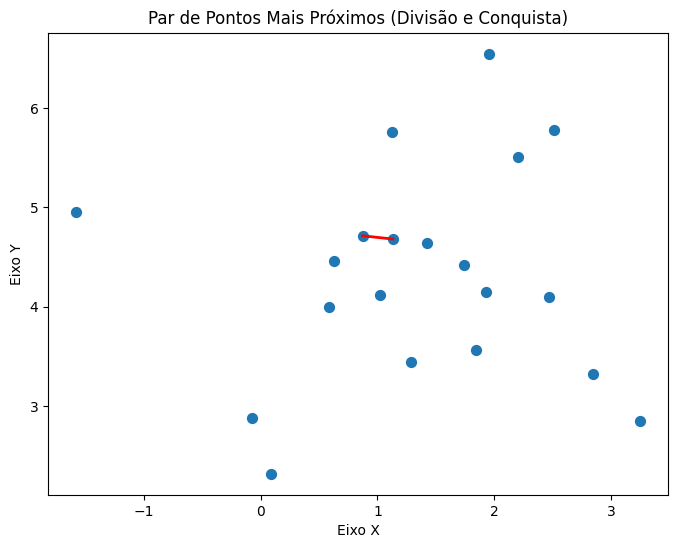

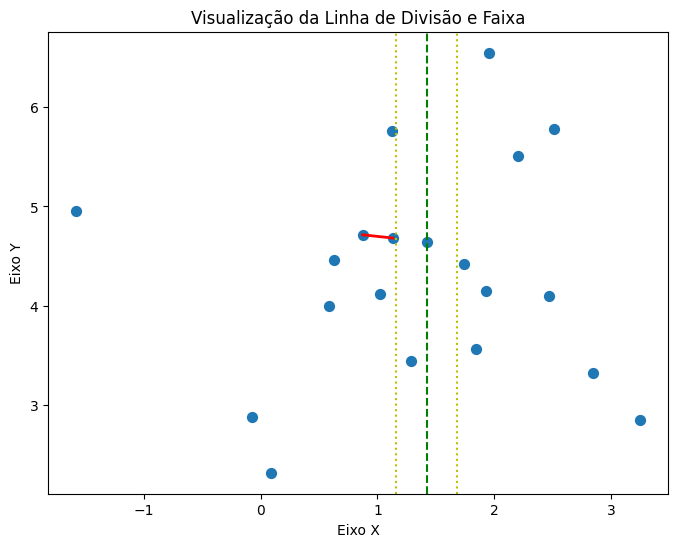

Distância mínima: 0.26
Ponto 1: [1.1312175  4.68194985]
Ponto 2: [0.87305123 4.71438583]


In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

def distancia_euclidiana(ponto1, ponto2):
    """Calcula a distância euclidiana entre dois pontos."""
    return np.sqrt(np.sum((ponto1 - ponto2)**2))

def forca_bruta(pontos):
    """Encontra o par de pontos mais próximo usando força bruta."""
    n = len(pontos)
    if n < 2:
        return float('inf'), None, None
    distancia_minima = distancia_euclidiana(pontos[0], pontos[1])
    ponto1_min, ponto2_min = pontos[0], pontos[1]
    for i in range(n):
        for j in range(i + 1, n):
            distancia = distancia_euclidiana(pontos[i], pontos[j])
            if distancia < distancia_minima:
                distancia_minima = distancia
                ponto1_min, ponto2_min = pontos[i], pontos[j]
    return distancia_minima, ponto1_min, ponto2_min

def par_mais_proximo_recursivo(pontos_x, pontos_y):
    """Encontra o par de pontos mais próximo usando divisão e conquista."""
    n = len(pontos_x)
    # Caso base: Se houver menos de 3 pontos, use força bruta
    if n <= 3:
        return forca_bruta(pontos_x)

    # Divide os pontos em duas metades
    meio = n // 2
    esquerda_x = pontos_x[:meio]
    direita_x = pontos_x[meio:]
    linha_divisao = pontos_x[meio][0]

    # Divide os pontos y em dois conjuntos
    esquerda_y = [p for p in pontos_y if p[0] <= linha_divisao]
    direita_y = [p for p in pontos_y if p[0] > linha_divisao]

    # Encontra o par mais próximo recursivamente em cada metade
    distancia_esquerda, ponto1_esquerda, ponto2_esquerda = par_mais_proximo_recursivo(esquerda_x, esquerda_y)
    distancia_direita, ponto1_direita, ponto2_direita = par_mais_proximo_recursivo(direita_x, direita_y)

    # Determina a menor distância e o par de pontos correspondente
    if distancia_esquerda < distancia_direita:
        distancia_minima, ponto1_min, ponto2_min = distancia_esquerda, ponto1_esquerda, ponto2_esquerda
    else:
        distancia_minima, ponto1_min, ponto2_min = distancia_direita, ponto1_direita, ponto2_direita

    # Encontra o par mais próximo na faixa vertical central
    faixa = [p for p in pontos_y if abs(p[0] - linha_divisao) < distancia_minima]
    faixa.sort(key=lambda ponto: ponto[1])

    for i in range(len(faixa)):
        for j in range(i + 1, min(i + 7, len(faixa))):
            distancia = distancia_euclidiana(faixa[i], faixa[j])
            if distancia < distancia_minima:
                distancia_minima = distancia
                ponto1_min, ponto2_min = faixa[i], faixa[j]

    return distancia_minima, ponto1_min, ponto2_min

# Gera pontos aleatórios em 2D
pontos, _ = make_blobs(n_samples=20, centers=1, random_state=0)

# Plota os pontos gerados
plt.figure(figsize=(8, 6))
plt.scatter(pontos[:, 0], pontos[:, 1], s=50)
plt.title('Pontos Gerados Aleatoriamente')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

# Ordena os pontos por coordenada x e y para a abordagem divisão e conquista
pontos_x = sorted(pontos, key=lambda ponto: ponto[0])
pontos_y = sorted(pontos, key=lambda ponto: ponto[1])

# Executa o algoritmo de par mais próximo
distancia, ponto1, ponto2 = par_mais_proximo_recursivo(pontos_x, pontos_y)

# Plota o resultado
plt.figure(figsize=(8, 6))
plt.scatter(pontos[:, 0], pontos[:, 1], s=50)
plt.plot([ponto1[0], ponto2[0]], [ponto1[1], ponto2[1]], 'r-', linewidth=2)
plt.title('Par de Pontos Mais Próximos (Divisão e Conquista)')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

# Visualização da linha de divisão e faixa
plt.figure(figsize=(8, 6))
plt.scatter(pontos[:, 0], pontos[:, 1], s=50)
plt.plot([ponto1[0], ponto2[0]], [ponto1[1], ponto2[1]], 'r-', linewidth=2)
linha_divisao = pontos_x[len(pontos_x)//2][0]
plt.axvline(x=linha_divisao, color='g', linestyle='--')
faixa_esquerda = linha_divisao - distancia
faixa_direita = linha_divisao + distancia
plt.axvline(x=faixa_esquerda, color='y', linestyle=':')
plt.axvline(x=faixa_direita, color='y', linestyle=':')
plt.title('Visualização da Linha de Divisão e Faixa')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

print(f"Distância mínima: {distancia:.2f}")
print(f"Ponto 1: {ponto1}")
print(f"Ponto 2: {ponto2}")